In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np 

In [2]:
tokenizer = Tokenizer()

# sonnets.txt
!gdown --id 108jAePKK4R3BVYBbYJZ32JWUwxeMg20K

data = open('./sonnets.txt').read()

corpus = data.lower().split("\n")


tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences 
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

Downloading...
From: https://drive.google.com/uc?id=108jAePKK4R3BVYBbYJZ32JWUwxeMg20K
To: /content/sonnets.txt
100% 93.6k/93.6k [00:00<00:00, 23.1MB/s]


In [3]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))# Embedding Layer)
model.add(Bidirectional(LSTM(150, return_sequences = True)))# An LSTM Layer)
model.add(Dropout(0.2))# A dropout layer)
model.add(LSTM(100))# Another LSTM Layer)
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))# A Dense Layer including regularizers)
model.add(Dense(total_words, activation='softmax'))# A Dense Layer)
# optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])# loss function and an optimizer)

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 100)           321100    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 300)           301200    
_________________________________________________________________
dropout (Dropout)            (None, 10, 300)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense (Dense)                (None, 1605)              162105    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,101,671
Trainable params: 6,101,671
Non-trainable params: 0
______________________________________________

In [4]:
 history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 22s 24ms/step - loss: 6.8939 - accuracy: 0.0241
Epoch 2/100
484/484 [==============================] - 12s 24ms/step - loss: 6.4997 - accuracy: 0.0230
Epoch 3/100
484/484 [==============================] - 12s 24ms/step - loss: 6.4112 - accuracy: 0.0217
Epoch 4/100
484/484 [==============================] - 12s 24ms/step - loss: 6.2928 - accuracy: 0.0292
Epoch 5/100
484/484 [==============================] - 11s 24ms/step - loss: 6.1902 - accuracy: 0.0369
Epoch 6/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0979 - accuracy: 0.0395
Epoch 7/100
484/484 [==============================] - 12s 24ms/step - loss: 6.0185 - accuracy: 0.0398
Epoch 8/100
484/484 [==============================] - 12s 24ms/step - loss: 5.9292 - accuracy: 0.0455
Epoch 9/100
484/484 [==============================] - 11s 24ms/step - loss: 5.8292 - accuracy: 0.0504
Epoch 10/100
484/484 [==============================] - 11s 23ms/step - l

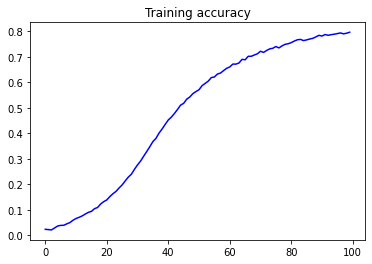

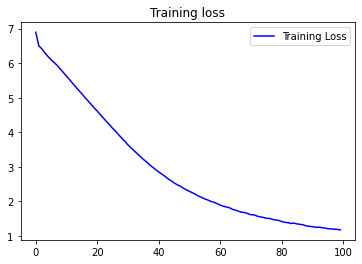

In [5]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
seed_text = "Help me Obi Wan Kenobi, you're my only hope"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = model.predict(token_list, verbose=0)
    predicted = np.argmax(predicted,axis=1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
      if index == predicted:
        output_word = word
        break
    seed_text += " " + output_word
print(seed_text)

Help me Obi Wan Kenobi, you're my only hope some where their rhyme state inhearse another hide his hand twain day must ride go of days dyed taken prove thee young days confounds wanting view heart fears to say done you die true youth be true lie me in me sun ' lies do dwell chide loss must lie with his power with loss and glance one past woe hour express'd despise express'd seen stand mad suppress'd war's sit brow ' must be ride go at me dear mind true wrong right bettering light days clears shown hence erred weeks fight taken depend twain twain express'd translate tend can
